In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/MyDrive/project/'

/content/drive/.shortcut-targets-by-id/1MG5qbQ0whefvbr056GUnZf-XfwttrcXj/project


In [3]:
import pandas as pd
import numpy as np

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
dt=pd.read_csv('/content/drive/MyDrive/project/pkml.csv')
de=pd.read_csv('requests.csv')

In [6]:
dt.columns

Index(['method', 'uri', 'query', 'protocol', 'Accept-Language',
       'Accept-Encoding', 'Accept', 'User-Agent', 'classification'],
      dtype='object')

In [7]:
de.columns

Index(['uri', 'method', 'query', 'Accept', 'Accept-Encoding',
       'Accept-Language', 'User-Agent', 'classification'],
      dtype='object')

In [8]:
x=['uri','method','query','Accept','Accept-Encoding','Accept-Language','User-Agent']
t=['uri','method','query','Accept','Accept-Encoding','Accept-Language','User-Agent','classification']


In [9]:
from urllib.parse import unquote

In [10]:
dt=dt.append(de)
data=dt[x].fillna('').astype(str)


<ipython-input-10-5d4f1a1536db>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt=dt.append(de)


In [11]:
len(data)

70735

In [12]:
x_data=[]
tokenizer=Tokenizer(oov_token=1,char_level=1)
for s in data.values:
  d=""
  z=0
  for i in s:
    if i!='':
      d+=x[z]+" : "+i+" \n"
    z+=1
  x_data.append(d.lower())

tokenizer.fit_on_texts(x_data)

In [13]:
vocab_size=len(tokenizer.word_counts)+100
print(vocab_size)

167


In [14]:
print(*x_data[:5])

uri : /l_t@/_feu1wvhtpass2/1nieqnnrvnzktuasain/tg1arifg_onc_d/ms/o1xryttk34/ovkr_d8zz/dwvcnk7aq-m1crgy_/zyhrk2p0brdp/oe/pyyxrggnhik2n1twii.png 
method : get 
query : crteyreti=wsn&et3tf6shov=tdsviee+y+fum%24oh3%3bore&saib5hfavhepc=tcilbrr+lne 
accept : */* 
accept-encoding : compress;q=0.1 
accept-language : apnalto-md;q=0.6, asdn-ee, eai-5ns;q=0.0 
user-agent : lnujse/3.5.6.9 
 uri : /inssgtz7ieltdsstbw7e/neqhmsdwu7imdb0etet/et/hsvegbff/eh/niravlwgk_l/oslnbwchrk5ogmi/tmljfqsww/ssjs6krjb.html 
method : get 
query : settotzeertnl=%27pn+&8nafitm=74lukuc5t0j&4ttne=anmsyusi6&mf1g-vyqyx=elttsw&euoytxprthane=e229evoy%401&tu=aht7hhgettiuy&hol=74723&7emgo0il=aahri&oclupha=ocark01n&ditduesn4on=vs%24&prfclmdeiaeed=n0drn7genterci&metucwotoiwr=5n%2bwp4jo+%5dp&emt=11zefsa2p 
accept : */* 
accept-encoding : *;q=0.7 
accept-language : ondtmsih-rqjk1;q=0.6 
user-agent : rfno5rdhfnnssmascs 
 uri : /fonrnt/7n.d-4brssxb@tu/qghew.cfm 
method : get 
accept : image/* 
accept-encoding : compress, compress, i

In [15]:
data.head()

,uri,method,query,Accept,Accept-Encoding,Accept-Language,User-Agent
0,/l_t@/_Feu1wvhtpass2/1nieQnnrvnzktuasain/tg1AR...,GET,crTeYreti=wsn&et3tf6shoV=tdsviee+y+fum%24oh3%3...,*/*,compress;q=0.1,"apnalTo-mD;q=0.6, asdn-Ee, eai-5ns;q=0.0",lnujse/3.5.6.9
1,/inssgtz7ieltdSstbw7e/neQhmsdwu7imdb0etet/eT/h...,GET,Settotzeertnl=%27pn+&8nafitm=74LuKUC5t0J&4ttNe...,*/*,*;q=0.7,ondtmsih-rqjk1;q=0.6,rfno5rdhfNnssmascs
2,/fonRnt/7N.D-4BRSsXb@TU/qgheW.cfm,GET,,image/*,"compress, compress, identity;q=0.6, deflate;q=0.1",*,nhgiopIe/7.8.4.7.0
3,/dyylkL.XD9cPu/4Ot0ta/ts6xNrP1/hssh/a2cuerht/s...,GET,DFDi7ftp=37redocumentilN&l4setbemmo=oe_RDzQ&rt...,"video/*, application/*",,*,Mozilla/9.5 (X11; U; Linux i586 8.6; Ee-ti; rv...
4,/2m6VLb1r37jSPC/cWVv/Mbar/oqrd0/msc/etceebwgi/...,GET,upcthyrsrtztir=90&o@gCv=uy&l6=S4&nrtrzevjgah=3...,"text/*, text/plain;q=0.7",*;q=0.9,*,daHeHds/8.3


**bold text**## 



In [16]:
padded=tokenizer.texts_to_sequences(x_data)

In [17]:
len(padded[0])


381

In [18]:
padded[0]

[18,
 11,
 6,
 3,
 23,
 3,
 14,
 13,
 53,
 5,
 54,
 14,
 53,
 32,
 2,
 18,
 28,
 31,
 43,
 21,
 5,
 15,
 4,
 12,
 12,
 20,
 14,
 28,
 7,
 6,
 2,
 27,
 7,
 7,
 11,
 43,
 7,
 48,
 46,
 5,
 18,
 4,
 12,
 4,
 6,
 7,
 14,
 5,
 16,
 28,
 4,
 11,
 6,
 32,
 16,
 53,
 8,
 7,
 9,
 53,
 19,
 14,
 17,
 12,
 14,
 8,
 28,
 33,
 11,
 35,
 5,
 5,
 46,
 37,
 41,
 14,
 8,
 43,
 46,
 11,
 53,
 19,
 44,
 48,
 48,
 14,
 19,
 31,
 43,
 9,
 7,
 46,
 45,
 4,
 27,
 29,
 17,
 28,
 9,
 11,
 16,
 35,
 53,
 14,
 48,
 35,
 21,
 11,
 46,
 20,
 15,
 10,
 34,
 11,
 19,
 15,
 14,
 8,
 2,
 14,
 15,
 35,
 35,
 33,
 11,
 16,
 16,
 7,
 21,
 6,
 46,
 20,
 7,
 28,
 5,
 31,
 6,
 6,
 22,
 15,
 7,
 16,
 3,
 25,
 17,
 2,
 5,
 21,
 8,
 19,
 3,
 23,
 3,
 16,
 2,
 5,
 3,
 25,
 27,
 18,
 2,
 11,
 35,
 3,
 23,
 3,
 9,
 11,
 5,
 2,
 35,
 11,
 2,
 5,
 6,
 24,
 31,
 12,
 7,
 39,
 2,
 5,
 37,
 5,
 32,
 42,
 12,
 21,
 8,
 43,
 24,
 5,
 19,
 12,
 43,
 6,
 2,
 2,
 47,
 35,
 47,
 32,
 18,
 17,
 26,
 20,
 41,
 8,
 21,
 37,
 26,
 37,
 34,
 8,


In [19]:
padded=pad_sequences(padded)

In [20]:
input_len=padded.shape[1]
print(input_len,padded.shape)

1339 (70735, 1339)


In [21]:
padded=np.reshape(padded,(-1,padded.shape[1],1))

In [22]:
%cd "/content/drive/MyDrive/dataset"

/content/drive/MyDrive/dataset


In [23]:
import tensorflow as tf

learning_rate = 0.00008
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-7

optimizer = tf.keras.optimizers.Adam(
    learning_rate=learning_rate,
    beta_1=beta_1,
    beta_2=beta_2,
    epsilon=epsilon,
    name="Adam_optimizer"
)

inputs = tf.keras.Input(shape=(input_len,))
embedding_dim = 32

x = tf.keras.layers.Embedding(vocab_size+1, embedding_dim,input_length=input_len)(inputs)
x = tf.keras.layers.Dropout(rate=0.3)(x)
x = tf.keras.layers.Conv1D(filters=128, kernel_size=30, activation='relu', padding='valid')(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu', padding='valid')(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1339)]            0         
                                                                 
 embedding (Embedding)       (None, 1339, 32)          5376      
                                                                 
 dropout (Dropout)           (None, 1339, 32)          0         
                                                                 
 conv1d (Conv1D)             (None, 1310, 128)         123008    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 655, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 636, 64)           163904    
                                                             

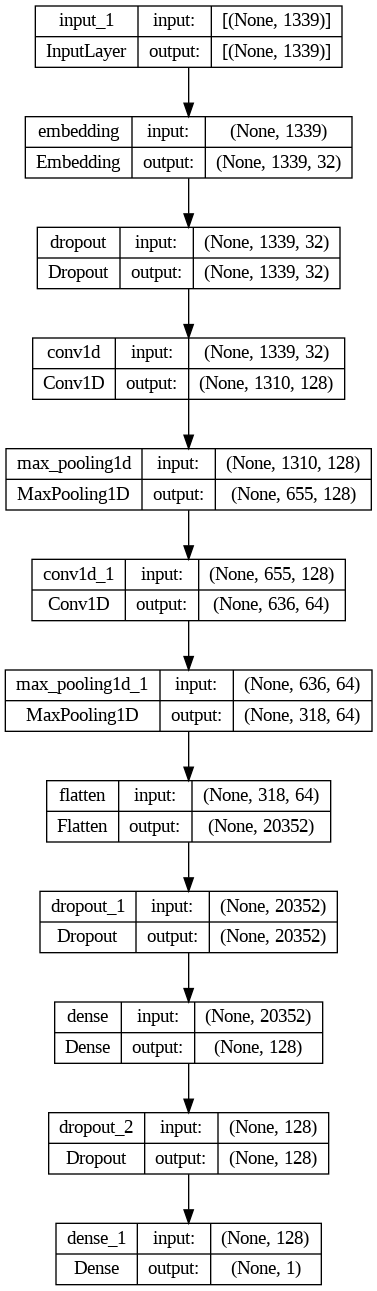

In [24]:
from tensorflow.keras.utils import plot_model


plot_model(model,show_shapes=True)

In [25]:

# dt['type'].unique()

In [26]:
y=np.array(dt['classification'])

In [27]:
len(y)

70735

In [28]:
y=np.reshape(y,(-1,1))
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]




```
# This is formatted as code
```

# normal = 0 and anomalous=1

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.4, random_state=42,stratify=y,shuffle=True)
x_val,x_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42,stratify=y_test,shuffle=True)


In [30]:
epochs=50

In [31]:
len(y[y==1])

35729

In [32]:
his=model.fit(X_train,y_train,validation_data=(x_val,y_val),verbose=1,batch_size=1000,epochs=epochs)

Epoch 1/50
43/43 [==============================] - 40s 525ms/step - loss: 0.5679 - accuracy: 0.7522 - val_loss: 0.4158 - val_accuracy: 0.8470
Epoch 2/50
43/43 [==============================] - 18s 411ms/step - loss: 0.3281 - accuracy: 0.8742 - val_loss: 0.2629 - val_accuracy: 0.8964
Epoch 3/50
43/43 [==============================] - 18s 410ms/step - loss: 0.2215 - accuracy: 0.9249 - val_loss: 0.2185 - val_accuracy: 0.9217
Epoch 4/50
43/43 [==============================] - 18s 412ms/step - loss: 0.1951 - accuracy: 0.9364 - val_loss: 0.1939 - val_accuracy: 0.9348
Epoch 5/50
43/43 [==============================] - 18s 411ms/step - loss: 0.1854 - accuracy: 0.9405 - val_loss: 0.1858 - val_accuracy: 0.9392
Epoch 6/50
43/43 [==============================] - 18s 413ms/step - loss: 0.1790 - accuracy: 0.9426 - val_loss: 0.1775 - val_accuracy: 0.9428
Epoch 7/50
43/43 [==============================] - 18s 410ms/step - loss: 0.1758 - accuracy: 0.9436 - val_loss: 0.1751 - val_accuracy: 0.9449

In [33]:
score=model.evaluate(x_test,y_test,verbose=1)

443/443 [==============================] - 3s 6ms/step - loss: 0.1383 - accuracy: 0.9514


In [34]:
model.save('model.h5')

In [35]:
import matplotlib.pyplot as plt

In [36]:
x=np.arange(1,epochs+1,1)

In [37]:
his.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

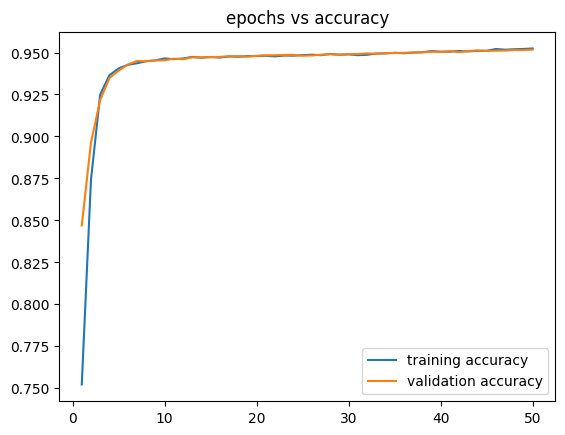

In [38]:
plt.plot(x,his.history['accuracy'],label='training accuracy')
plt.plot(x,his.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='best')
plt.title('epochs vs accuracy')
plt.savefig('accuracy_vs_epochs.jpg')
plt.show()

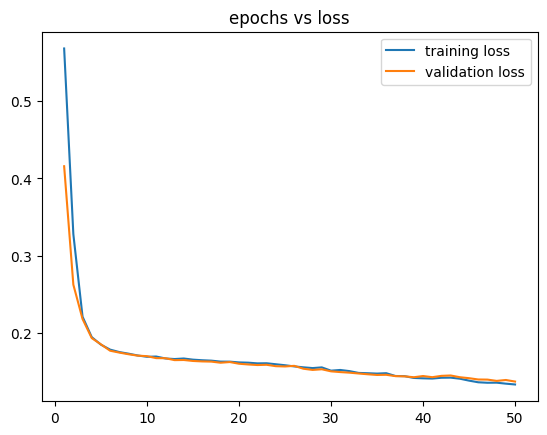

In [39]:
plt.plot(x,his.history['loss'],label='training loss')
plt.plot(x,his.history['val_loss'],label='validation loss')
plt.legend(loc='best')
plt.title('epochs vs loss')
plt.savefig('loss_vs_epochs.jpg')
plt.show()

In [40]:
import pickle

with open('model_pickle.pkl','wb') as f:
  pickle.dump(model,f)


with open('tokenizer.pkl','wb') as f:
  pickle.dump(tokenizer,f)

with open('padded_sequence.pkl','wb') as f:
  pickle.dump(pad_sequences,f)

In [41]:
labels=["Normal",'Anamalous']
def get_label(y):
  return labels[int(y>=0.5)]

In [42]:
y_pred=model.predict(x_test)
y_predicted=[get_label(x) for x in y_pred]
y_actual=[get_label(x) for x in y_test]

443/443 [==============================] - 2s 4ms/step


In [43]:
y_predicted[:5]

['Normal', 'Normal', 'Anamalous', 'Anamalous', 'Anamalous']

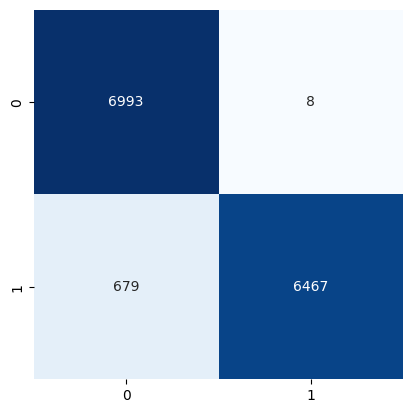

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_actual, y_predicted,labels=labels)
matrix=sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
matrix.figure.savefig('confusion_matrix.jpg')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,y_predicted))

              precision    recall  f1-score   support

   Anamalous       1.00      0.90      0.95      7146
      Normal       0.91      1.00      0.95      7001

    accuracy                           0.95     14147
   macro avg       0.96      0.95      0.95     14147
weighted avg       0.96      0.95      0.95     14147



In [46]:
y_pred

array([[0.03843963],
       [0.22313905],
       [1.        ],
       ...,
       [0.05625778],
       [0.05242082],
       [1.        ]], dtype=float32)

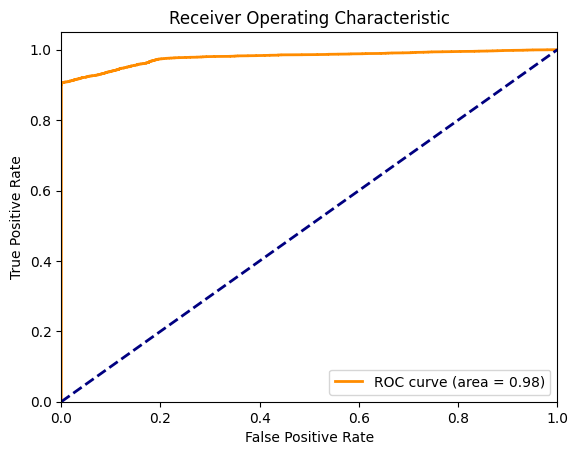

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# predict probabilities for test set
# y_test_proba = model.predict(X_test)

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [48]:
import tensorflow as tf

def binary_accuracy_with_threshold(y_true, y_pred, threshold=0.5):
    y_pred = tf.cast(y_pred >= threshold, tf.float32)
    return tf.keras.metrics.binary_accuracy(y_true, y_pred)


In [49]:
x='''/favicon.ico
 GET
image/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8
en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6
utf-8, utf-8;q=0.5, *;q=0.5 
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36
60
'''

In [50]:
x

'/favicon.ico\n GET\nimage/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8\nen-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6\nutf-8, utf-8;q=0.5, *;q=0.5 \nMozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36\n60\n'

In [51]:

x=tokenizer.texts_to_sequences([x])

In [52]:
x=pad_sequences(x,maxlen=input_len)

In [53]:
model.predict(x)

1/1 [==============================] - 0s 186ms/step


array([[0.17508487]], dtype=float32)

In [54]:
# dt[dt['Class']=='Valid']['URI'].head()